In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces


# used for manipulating directory paths
import os

%matplotlib inline

In [4]:
# Load data
data = np.loadtxt(os.path.join('Data', 'ex1data2.txt'), delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = y.size

# print out some data points
print('{:>8s}{:>8s}{:>10s}'.format('X[:,0]', ' X[:, 1]', 'y'))
print('-'*26)
for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], y[i]))

  X[:,0] X[:, 1]         y
--------------------------
    2104       3    399900
    1600       3    329900
    2400       3    369000
    1416       2    232000
    3000       4    539900
    1985       4    299900
    1534       3    314900
    1427       3    198999
    1380       3    212000
    1494       3    242500


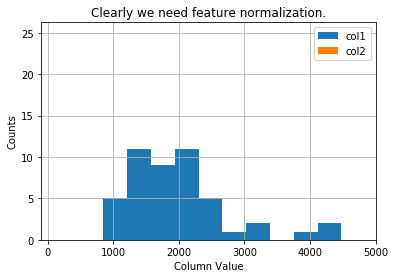

In [7]:
# Need for Feature Normalisation

plt.grid(True)
plt.xlim([-100,5000])
dummy = plt.hist(X[:,0],label = 'col1')
dummy = plt.hist(X[:,1],label = 'col2')

plt.title('Clearly we need feature normalization.')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()

## Feature Normalisation

In [8]:
def  featureNormalize(X):
    """
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n).
    
    Returns
    -------
    X_norm : array_like
        The normalized dataset of shape (m x n).
    """
   
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    
    for i in range(0,X.shape[1]):
        m = np.mean(X[:,i])
        std = np.std(X[:,i])
        X_norm[:,i] = (X[:,i] - m) / std
        mu[i] = m
        sigma[i] = std

    return X_norm, mu, sigma

In [9]:
# call featureNormalize on the loaded data
X_norm, mu, sigma = featureNormalize(X)


print('Computed mean:', mu)
print('Computed standard deviation:', sigma)


Computed mean: [2000.68085106    3.17021277]
Computed standard deviation: [7.86202619e+02 7.52842809e-01]


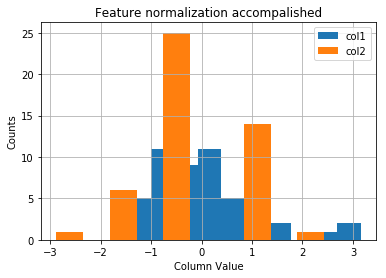

In [14]:
plt.grid(True)
#plt.xlim([-100,5000])
dummy = plt.hist(X_norm[:,0],label = 'col1')
dummy = plt.hist(X_norm[:,1],label = 'col2')

plt.title('Feature normalization accompalished')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()

In [15]:
# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

## Gradient Descent

In [16]:
def computeCostMulti(X, y, theta):
    """
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    Returns
    -------
    J : float
        The value of the cost function. 
    """
   
    m = y.shape[0] # number of training examples
    J = 0
   
    h = np.dot(X,theta)
    l = [i**2 for i in h-y]
    J = 0.5*(1/m)*sum(l)

    return J


In [18]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    """"
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    alpha : float
        The learning rate for gradient descent. 
    
    num_iters : int
        The number of iterations to run gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    """
   
    m = y.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        h = np.dot(X,theta)
        theta = theta-alpha*(1.0/m)*np.dot(X.T,h-y)

        
        # save the cost J in every iteration
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

## Proper Learning Rate Selection

theta computed from gradient descent: [340410.91897274 109162.68848142  -6293.24735132]
Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $293142
0.03


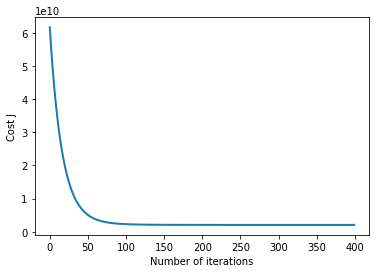

In [20]:
# Choose some alpha value - change this
alpha = 0.03
num_iters = 400

# init theta and run gradient descent
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Plot the convergence graph
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))

# Estimate the price of a 1650 sq-ft, 3 br house
# The first column of X is all-ones. 
# Thus, it does not need to be normalized.

ytest = np.array([1650.,3.])
ytestscaled = [(ytest[x]-mu[x])/sigma[x] for x in range(len(ytest))] #Peforming Feature Normalisation
ytestscaled.insert(0,1) # Adding Intercept Value

price =np.dot(ytestscaled,theta)
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${:.0f}'.format(price))
print(alpha)